#¿Cuáles son los factores clave que contribuyen a la viralidad de un video en YouTube?

### **1. Categoría de Contenido**
   - ¿Cuáles son las categorías de contenido más comunes entre los videos virales?
   - ¿Qué categorías suelen tener videos con mayor cantidad de vistas promedio?
   - ¿Qué temas específicos (de `topic_categories`) son recurrentes en los videos virales?
   - ¿Qué categorías generan mayor interacción por parte de los usuarios (likes y comentarios)?


### **2. Etiquetas (Tags)**
   - ¿Cuáles son las etiquetas (`tags`) más comunes en los videos con alto número de likes?
   - ¿Existen ciertas etiquetas que se repiten en los videos virales?
   - ¿Cómo afecta la calidad de video (`definition`) en la viralidad?
   - ¿Cuál es el número típico de etiquetas en videos virales?

### **3. Impacto del Tipo de Video**
   - ¿Los videos marcados como aptos para niños (`made_for_kids`) presentan patrones distintos en términos de viralidad?

### **4. Análisis de Títulos y Descripciones**
   - ¿Cuáles son los términos más comunes en los títulos de los videos virales?
   - ¿Cuánto influye la longitud de los títulos (en palabras) en la viralidad?
   - ¿Es frecuente que los títulos de videos virales se presenten como preguntas?
   - Análisis de Temáticas: Analizar las palabras y frases más frecuentes en los títulos y descripciones para identificar las temáticas más comunes en videos virales.
   - ¿Qué tan largas son las descripciones en promedio en los videos que se vuelven virales?

### **5. Análisis Temporal**
   - ¿A qué hora del día es más efectivo publicar un video para que se vuelva viral?
   - ¿Cuánto tiempo suele pasar desde que se publica un video hasta que alcanza la viralidad?
   - ¿Cuál es la duración promedio de los videos virales?
   - ¿Los videos virales tienden a publicarse en ciertos días de la semana?

   Aquí tienes la sección sobre BERTopic para incluir en tu análisis:

---

### **6. Análisis de Tópicos con BERTopic**
   - ¿Qué temas predominan en los videos virales al realizar un modelado de tópicos con BERTopic?
   - Visualización de los temas detectados: ¿Qué temas tienen mayor relevancia en la viralidad de los videos?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
videos = pd.read_excel("/content/popular_videos.xlsx")

In [ ]:
# Filtramos solo los videos que se encuentran en ingles
videos = videos[videos["detected_language"] == "en"]

In [ ]:
# Quitamos la columna de dislikes ya que se encuentra vacía
videos.drop(columns=["dislike_count"], inplace=True)

##Análisis Descriptivo y Exploración de Datos

In [ ]:
videos.head()

,video_id,title,description,published_at,view_count,like_count,comment_count,tags,duration,definition,...,licensed_content,topic_categories,category,embeddable,public_stats_viewable,privacy_status,license,made_for_kids,region,detected_language
0,W7YT9--8IoY,"""Barbering and Fashion: HoWStyle Infiuences Ha...",NaN,2024-11-01T19:28:52Z,278846,18108.0,204.0,NaN,PT1M14S,hd,...,True,https://en.wikipedia.org/wiki/Lifestyle_(socio...,Howto & Style,True,True,public,youtube,False,US,en
2,D7F42F_JM3U,Lil Uzi Vert - Chill Bae [Official Music Video],"Lil Uzi Vert - ""Chill Bae"" \nETERNAL ATAKE 2 O...",2024-11-01T04:00:08Z,1645340,74900.0,5173.0,"Lil, Uzi, Vert, Lil Uzi Vert, Eternal Atake, M...",PT3M25S,hd,...,True,https://en.wikipedia.org/wiki/Electronic_music...,Music,True,True,public,youtube,False,US,en
4,4ZxQ5rR8VwA,"Is This a WW2 German Spy Hideout, Discovered i...",Thanks to AG1 for sponsoring this video. Click...,2024-11-01T19:12:41Z,298814,17512.0,1715.0,NaN,PT25M12S,hd,...,True,https://en.wikipedia.org/wiki/Lifestyle_(socio...,People & Blogs,True,True,public,youtube,False,US,en
5,kliFaScJfTg,Young Thug Gives Heartfelt Speech Before Walki...,"Young Thug, real name Jeffery Williams, took a...",2024-10-31T23:00:39Z,759565,15814.0,2473.0,"law and crime, law and crime network",PT9M19S,hd,...,True,https://en.wikipedia.org/wiki/Society,Entertainment,True,True,public,youtube,False,US,en
6,xNudqMNIlB8,"Reload Desert Drop: New Map, Solos, and More",Fortnite Reload’s Desert Drop arrives on Novem...,2024-11-01T22:43:59Z,1775153,38076.0,2620.0,yt:cc=on,PT30S,hd,...,True,https://en.wikipedia.org/wiki/Action-adventure...,Gaming,True,True,public,youtube,False,GB,en


In [ ]:
videos.describe()

,view_count,like_count,comment_count
count,5.370000e+02,5.350000e+02,532.000000
mean,6.481655e+06,2.268445e+05,7193.137218
std,2.089748e+07,6.547292e+05,30289.124283
min,4.036100e+04,5.680000e+02,0.000000
25%,3.986920e+05,1.264500e+04,991.000000
50%,1.053751e+06,3.733900e+04,2195.000000
75%,3.965845e+06,1.284115e+05,4293.750000
max,2.880381e+08,8.144433e+06,535543.000000


In [ ]:
videos.shape

(537, 21)

In [ ]:
videos.dtypes

,0
video_id,object
title,object
description,object
published_at,object
view_count,int64
like_count,float64
comment_count,float64
tags,object
duration,object
definition,object


In [ ]:
videos.isna().sum()

,0
video_id,0
title,0
description,42
published_at,0
view_count,0
like_count,2
comment_count,5
tags,140
duration,0
definition,0


In [ ]:
videos.duplicated().sum()

0

In [ ]:
conteo_por_region = videos['region'].value_counts()

# Mostrar el resultado
print("Conteo de filas por región:")
print(conteo_por_region)

Conteo de filas por región:
region
AU    212
CA    115
NZ    105
US     62
GB     43
Name: count, dtype: int64


##Métricas de los Videos

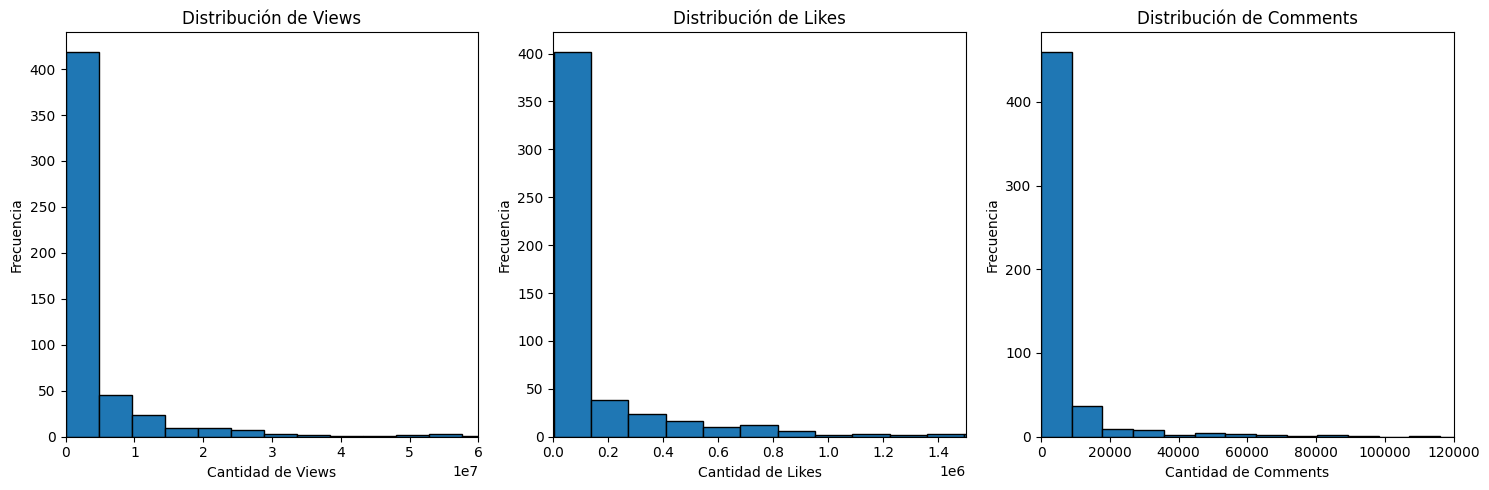

In [ ]:
# Crear histogramas para 'view_count', 'like_count', y 'comment_count'
plt.figure(figsize=(15, 5))

# Histograma de view_count
plt.subplot(1, 3, 1)
plt.hist(videos['view_count'].dropna(), bins=60, edgecolor='black')
plt.title('Distribución de Views')
plt.xlabel('Cantidad de Views')
plt.ylabel('Frecuencia')
plt.xlim(0, 0.6e8)

# Histograma de like_count
plt.subplot(1, 3, 2)
plt.hist(videos['like_count'].dropna(), bins=60, edgecolor='black')
plt.title('Distribución de Likes')
plt.xlabel('Cantidad de Likes')
plt.ylabel('Frecuencia')
plt.xlim(0, 1.5e6)


# Histograma de comment_count
plt.subplot(1, 3, 3)
plt.hist(videos['comment_count'].dropna(), bins=60, edgecolor='black')
plt.title('Distribución de Comments')
plt.xlabel('Cantidad de Comments')
plt.ylabel('Frecuencia')
plt.xlim(0, 120000)


# Mostrar los histogramas
plt.tight_layout()
plt.show()

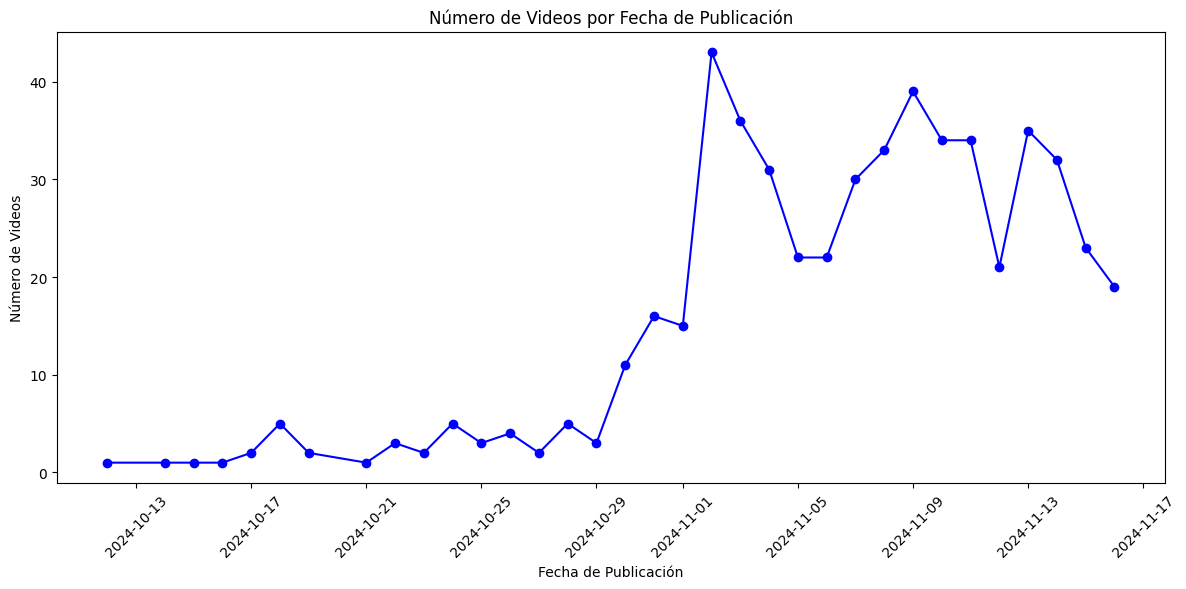

In [ ]:
# Convertir 'published_at' a tipo de dato datetime si no lo está
videos['published_at'] = pd.to_datetime(videos['published_at'], errors='coerce')

# Contar el número de videos publicados por fecha
videos_por_fecha = videos['published_at'].dt.date.value_counts().sort_index()

# Graficar el número de videos por fecha de publicación
plt.figure(figsize=(12, 6))
plt.plot(videos_por_fecha.index, videos_por_fecha.values, marker='o', linestyle='-', color='b')
plt.title('Número de Videos por Fecha de Publicación')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##1. Categoría de Contenido

Categorías de contenido más comunes entre los videos virales:
category
Sports                  112
Entertainment            98
Gaming                   74
Music                    56
People & Blogs           55
News & Politics          36
Science & Technology     17
Film & Animation         16
Comedy                   16
Howto & Style            15
Name: count, dtype: int64


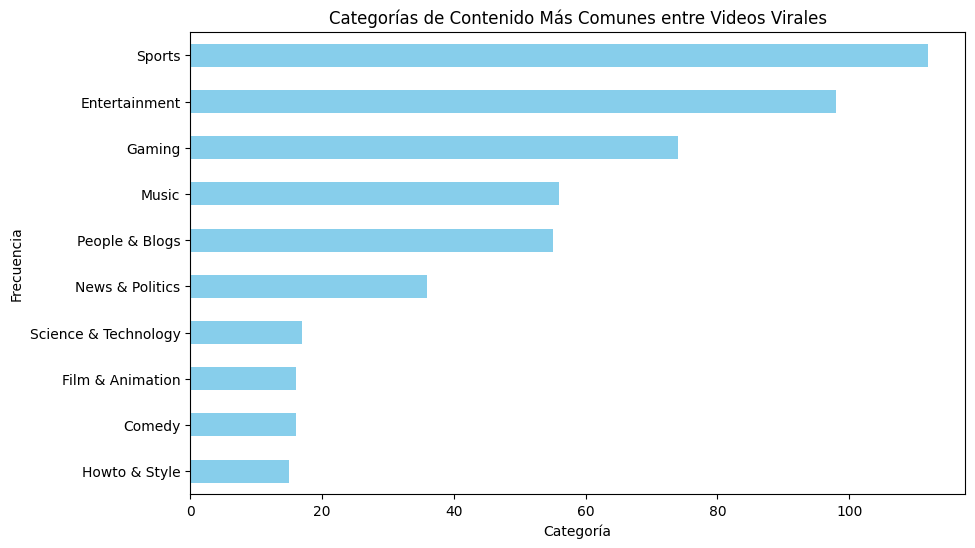

In [ ]:
# Contar las categorías de contenido más comunes
categorias_comunes = videos['category'].value_counts().sort_values(ascending=False)

# Mostrar las 10 categorías más comunes
print("Categorías de contenido más comunes entre los videos virales:")
print(categorias_comunes.head(10))

# Visualizar en gráfico de barras
plt.figure(figsize=(10, 6))
categorias_comunes.head(10).iloc[::-1].plot(kind='barh', color='skyblue')
plt.title('Categorías de Contenido Más Comunes entre Videos Virales')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


Categorías con mayor cantidad de vistas promedio:
category
Comedy                  1.432098e+07
Travel & Events         1.431298e+07
People & Blogs          1.356999e+07
Pets & Animals          9.954689e+06
Science & Technology    9.130453e+06
Entertainment           9.066938e+06
Music                   7.731956e+06
Film & Animation        4.598581e+06
Howto & Style           4.528613e+06
Sports                  4.194453e+06
Name: view_count, dtype: float64


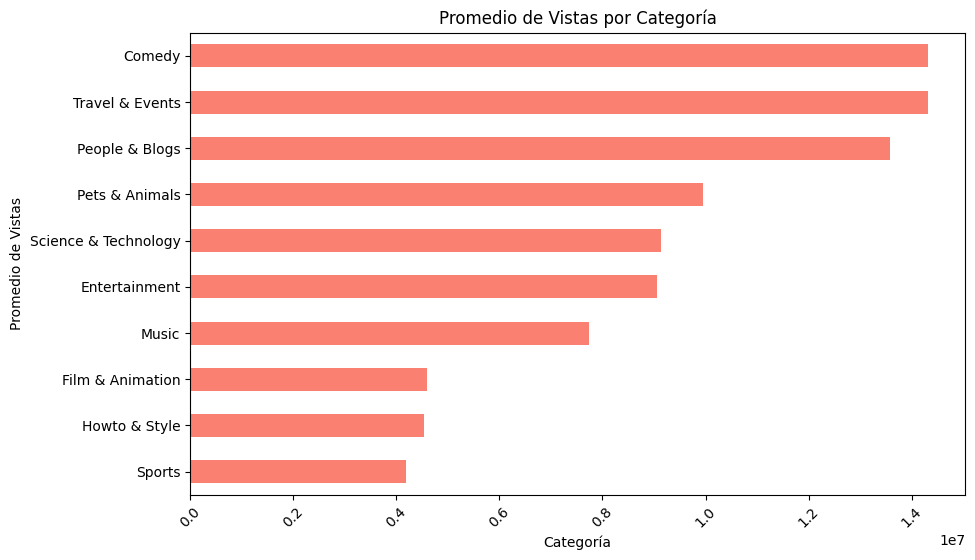

In [ ]:
# Calcular la cantidad promedio de vistas por categoría
vistas_promedio_por_categoria = videos.groupby('category')['view_count'].mean().sort_values(ascending=False)

# Mostrar las categorías con mayor promedio de vistas
print("Categorías con mayor cantidad de vistas promedio:")
print(vistas_promedio_por_categoria.head(10))

# Visualizar en gráfico de barras
plt.figure(figsize=(10, 6))
vistas_promedio_por_categoria.head(10).iloc[::-1].plot(kind='barh', color='salmon')
plt.title('Promedio de Vistas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Vistas')
plt.xticks(rotation=45)
plt.show()


Categorías con mayor interacción promedio (likes y comentarios):
                         like_count
category                           
Comedy                579479.625000
People & Blogs        478822.814815
Pets & Animals        462349.500000
Science & Technology  454787.294118
Travel & Events       446036.857143
Entertainment         308645.683673
Music                 275137.696429
Film & Animation      198227.687500
Education             176571.000000
Howto & Style         151394.642857


<Figure size 1000x600 with 0 Axes>

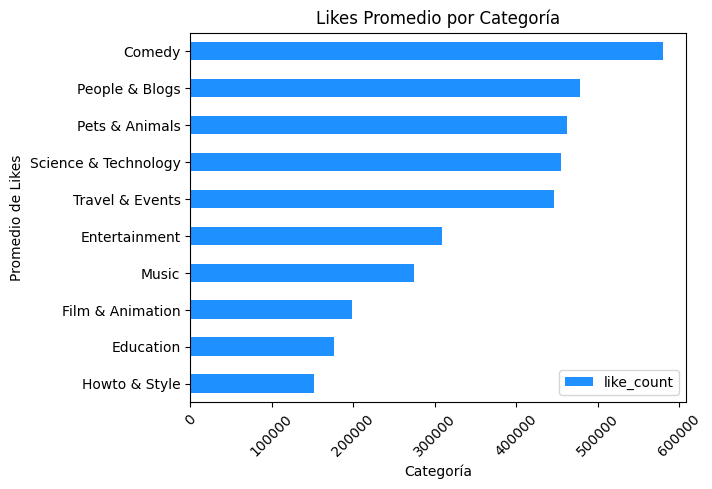

In [ ]:
# Calcular la cantidad promedio de likes y comentarios por categoría
interaccion_por_categoria = videos.groupby('category')[['like_count']].mean().sort_values(by='like_count', ascending=False)

# Mostrar las categorías con mayor interacción promedio
print("Categorías con mayor interacción promedio (likes y comentarios):")
print(interaccion_por_categoria.head(10))

# Visualizar en gráfico de barras
plt.figure(figsize=(10, 6))
interaccion_por_categoria.head(10).iloc[::-1].plot(kind='barh', stacked=False, color=['dodgerblue', 'tomato'])
plt.title('Likes Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Likes')
plt.xticks(rotation=45)
plt.show()


Categorías con mayor interacción promedio (comentarios):
                      comment_count
category                           
People & Blogs         21476.272727
Music                  14802.339286
Howto & Style           6978.333333
Education               6975.416667
Entertainment           6917.030928
Comedy                  6844.125000
Film & Animation        4809.687500
Science & Technology    4617.352941
News & Politics         3867.437500
Pets & Animals          3801.125000


<Figure size 1000x600 with 0 Axes>

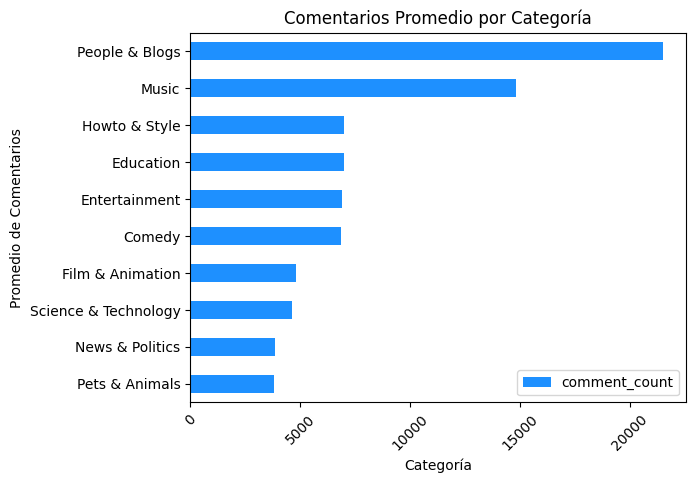

In [ ]:
# Calcular la cantidad promedio de likes y comentarios por categoría
interaccion_por_categoria = videos.groupby('category')[['comment_count']].mean().sort_values(by='comment_count', ascending=False)

# Mostrar las categorías con mayor interacción promedio
print("Categorías con mayor interacción promedio (comentarios):")
print(interaccion_por_categoria.head(10))

# Visualizar en gráfico de barras
plt.figure(figsize=(10, 6))
interaccion_por_categoria.head(10).iloc[::-1].plot(kind='barh', stacked=False, color=['dodgerblue', 'tomato'])
plt.title('Comentarios Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Comentarios')
plt.xticks(rotation=45)
plt.show()

##2. Tags

In [ ]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Descargar los recursos de NLTK si no los tienes aún
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Definir stopwords y lematizador
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Etiquetas más comunes en videos con alto número de likes (limpias):
highlight: 152
fortnite: 123
game: 121
league: 107
new: 99
v: 89
sport: 88
news: 80
tyson: 69
mike: 61


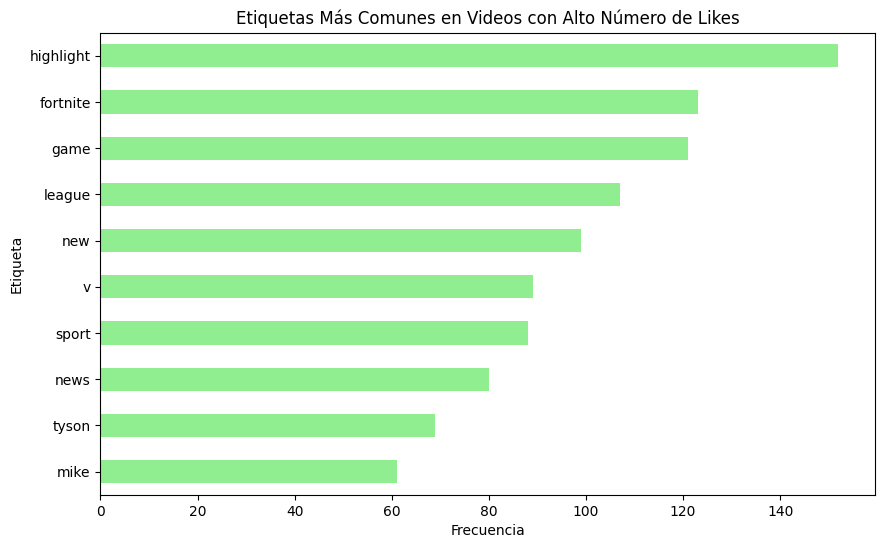

Etiquetas más comunes en videos virales:
highlight: 152
fortnite: 123
game: 121
league: 107
new: 99
v: 89
sport: 88
news: 80
tyson: 69
mike: 61


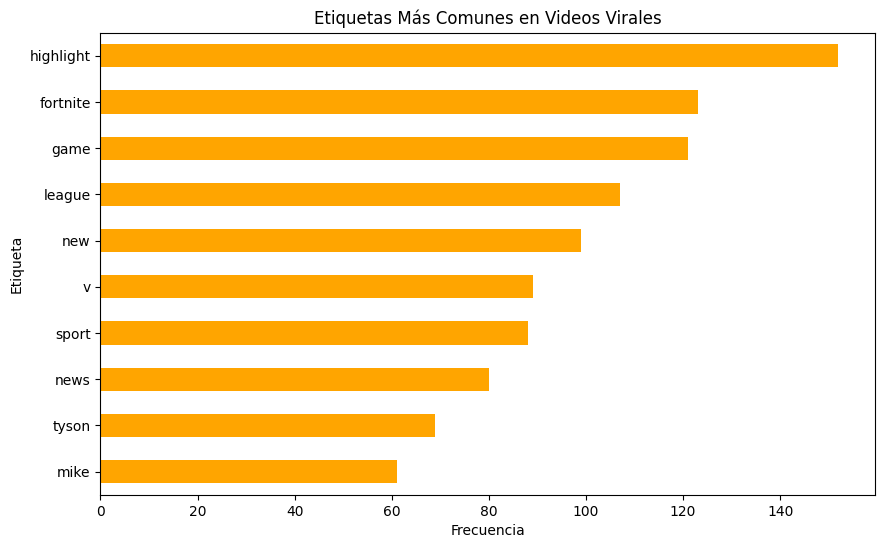

In [ ]:
# Limpiar las etiquetas eliminando signos de puntuación y aplicar lematización
def limpiar_etiquetas(tags_column):
    todas_las_etiquetas = " ".join(tags_column.dropna())
    etiquetas_limpias = re.sub(r'[\W_]+', ' ', todas_las_etiquetas).lower()
    palabras = etiquetas_limpias.split()
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras if palabra not in stopwords]
    return palabras

# Para las etiquetas en videos con alto número de likes
etiquetas_altos_likes = Counter(limpiar_etiquetas(videos['tags'])).most_common(10)
print("Etiquetas más comunes en videos con alto número de likes (limpias):")
for tag, count in etiquetas_altos_likes:
    print(f"{tag}: {count}")

# Graficar las etiquetas en un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
pd.Series(dict(etiquetas_altos_likes)).iloc[::-1].plot(kind='barh', color='lightgreen')
plt.title('Etiquetas Más Comunes en Videos con Alto Número de Likes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

# Para todas las etiquetas en videos virales
etiquetas_totales = Counter(limpiar_etiquetas(videos['tags'])).most_common(10)
print("Etiquetas más comunes en videos virales:")
for tag, count in etiquetas_totales:
    print(f"{tag}: {count}")

# Graficar las etiquetas en un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
pd.Series(dict(etiquetas_totales)).iloc[::-1].plot(kind='barh', color='orange')
plt.title('Etiquetas Más Comunes en Videos Virales')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()


Top 10 pares de etiquetas más comunes (filtrados para evitar repeticiones):
('league', 'football'): 21
('sports', 'highlights'): 16
('how', 'to'): 14
('battle', 'new'): 13
('game', 'games'): 13
('of', 'the'): 12
('paul', 'jake'): 12
('city', 'manchester'): 11
('family', 'friendly'): 11
('chapter', 'fortnite'): 10

Top 10 tríos de etiquetas más comunes (filtrados para evitar repeticiones):
('premier', 'league', 'football'): 15
('battle', 'new', 'update'): 11
('sports', 'city', 'manchester'): 9
('paul', 'mike', 'vs'): 9
('chapter', '2', 'remix'): 8
('sidemen', 'miniminter', 'ksi'): 8
('gaming', 'royale', 'fortnite'): 7
('election', 'harris', 'donald'): 7
('music', 'video', 'album'): 6
('futbol', 'soccer', 'highlights'): 6

Top 10 cuatrigramas de etiquetas más comunes (filtrados para evitar repeticiones):
('battle', 'royale', 'new', 'update'): 10
('league', 'football', 'city', 'manchester'): 10
('chapter', '2', 'remix', 'fortnite'): 8
('premier', 'epl', 'pl', 'highlights'): 6
('uefa', 'ch

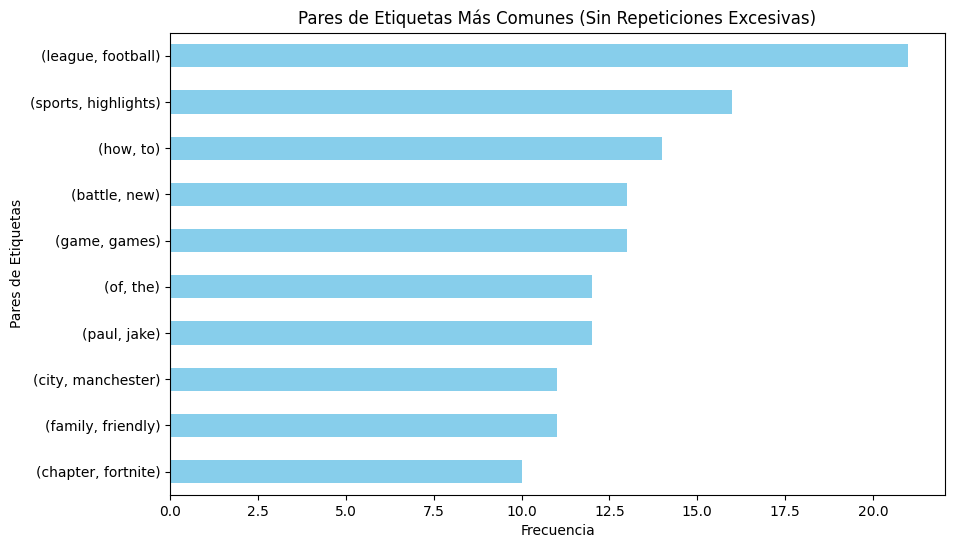

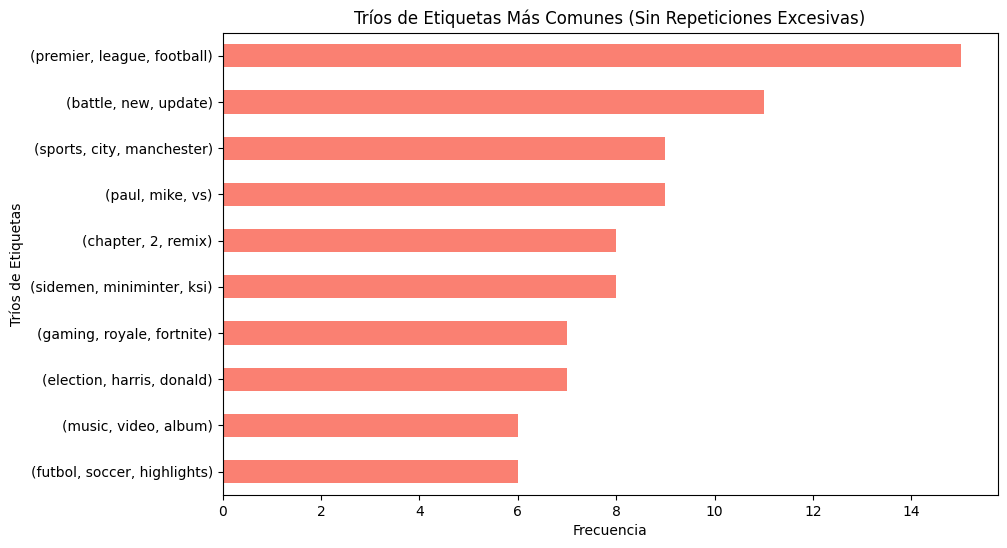

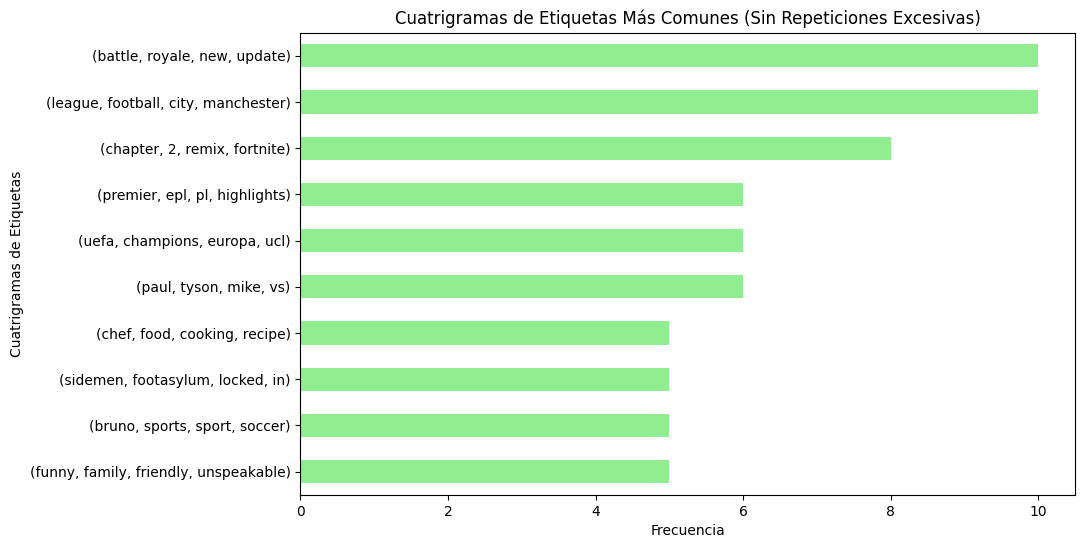

In [ ]:
from collections import Counter
from itertools import combinations
import re
import pandas as pd
import matplotlib.pyplot as plt

# Función para limpiar y dividir etiquetas en cada video sin duplicados
def obtener_etiquetas_unicas_por_video(tags_column):
    etiquetas_por_video = []
    for tags in tags_column.dropna():
        # Limpiar cada etiqueta y dividir por espacios
        etiquetas_limpias = re.sub(r'[^\w\s]', '', tags).lower()
        # Convertir a conjunto para eliminar duplicados
        etiquetas_unicas = list(set(etiquetas_limpias.split()))
        etiquetas_por_video.append(etiquetas_unicas)
    return etiquetas_por_video

# Obtener listas de etiquetas únicas por video
etiquetas_por_video = obtener_etiquetas_unicas_por_video(videos['tags'])

# Contar combinaciones de pares, tríos y cuatrigramas sin repetición excesiva de palabras
pares_contador = Counter()
trios_contador = Counter()
cuatris_contador = Counter()

for etiquetas in etiquetas_por_video:
    pares_contador.update(combinations(etiquetas, 2))
    trios_contador.update(combinations(etiquetas, 3))
    cuatris_contador.update(combinations(etiquetas, 4))

# Función para eliminar combinaciones que comparten palabras repetidas en el top
def filtrar_combinaciones(contador, top_n=10):
    top_combinaciones = []
    palabras_usadas = set()

    for combo, count in contador.most_common():
        # Revisar si alguna palabra de la combinación ya fue usada en el top_combinaciones
        if not any(palabra in palabras_usadas for palabra in combo):
            top_combinaciones.append((combo, count))
            palabras_usadas.update(combo)  # Agregar palabras al conjunto de palabras usadas
        if len(top_combinaciones) == top_n:
            break

    return top_combinaciones

# Obtener el top 10 de combinaciones de pares, tríos y cuatrigramas filtradas
top_pares_filtrados = filtrar_combinaciones(pares_contador, top_n=10)
top_trios_filtrados = filtrar_combinaciones(trios_contador, top_n=10)
top_cuatris_filtrados = filtrar_combinaciones(cuatris_contador, top_n=10)

# Mostrar los pares, tríos y cuatrigramas filtrados
print("Top 10 pares de etiquetas más comunes (filtrados para evitar repeticiones):")
for pair, count in top_pares_filtrados:
    print(f"{pair}: {count}")

print("\nTop 10 tríos de etiquetas más comunes (filtrados para evitar repeticiones):")
for trio, count in top_trios_filtrados:
    print(f"{trio}: {count}")

print("\nTop 10 cuatrigramas de etiquetas más comunes (filtrados para evitar repeticiones):")
for fourgram, count in top_cuatris_filtrados:
    print(f"{fourgram}: {count}")

# Graficar los 10 pares de etiquetas más comunes después del filtro
plt.figure(figsize=(10, 6))
pd.Series(dict(top_pares_filtrados)).iloc[::-1].plot(kind='barh', color='skyblue')
plt.title('Pares de Etiquetas Más Comunes (Sin Repeticiones Excesivas)')
plt.xlabel('Frecuencia')
plt.ylabel('Pares de Etiquetas')
plt.show()

# Graficar los 10 tríos de etiquetas más comunes después del filtro
plt.figure(figsize=(10, 6))
pd.Series(dict(top_trios_filtrados)).iloc[::-1].plot(kind='barh', color='salmon')
plt.title('Tríos de Etiquetas Más Comunes (Sin Repeticiones Excesivas)')
plt.xlabel('Frecuencia')
plt.ylabel('Tríos de Etiquetas')
plt.show()

# Graficar los 10 cuatrigramas de etiquetas más comunes después del filtro
plt.figure(figsize=(10, 6))
pd.Series(dict(top_cuatris_filtrados)).iloc[::-1].plot(kind='barh', color='lightgreen')
plt.title('Cuatrigramas de Etiquetas Más Comunes (Sin Repeticiones Excesivas)')
plt.xlabel('Frecuencia')
plt.ylabel('Cuatrigramas de Etiquetas')
plt.show()


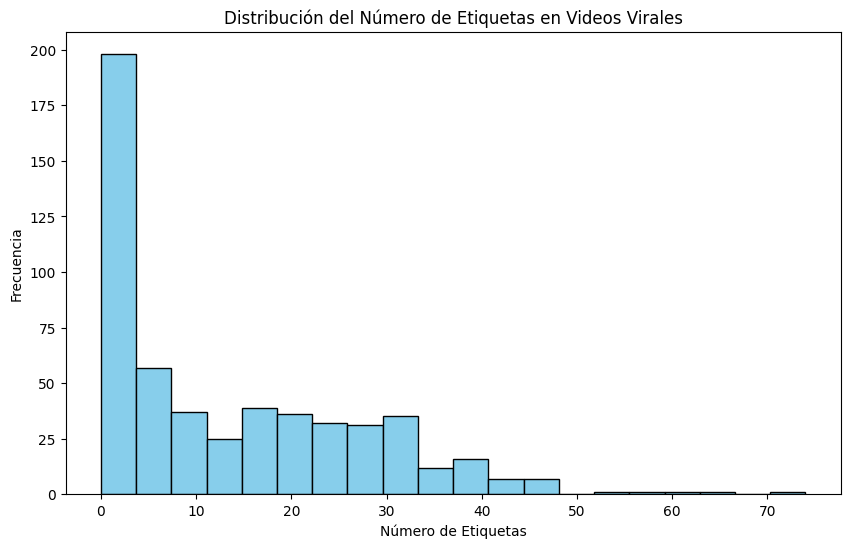

Estadísticas descriptivas del número de etiquetas por video:
count    537.000000
mean      13.279330
std       13.748548
min        0.000000
25%        0.000000
50%        9.000000
75%       24.000000
max       74.000000
Name: num_tags, dtype: float64

Número típico (mediana) de etiquetas en videos virales: 9.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que tienes un DataFrame llamado 'videos' con una columna 'tags'
# Si tienes un archivo, puedes cargarlo con:
# videos = pd.read_csv("nombre_del_archivo.csv")

# Reemplazar valores nulos en la columna 'tags' con una cadena vacía
videos['tags'] = videos['tags'].fillna('')

# Contar el número de etiquetas por video, asumiendo que están separadas por comas
videos['num_tags'] = videos['tags'].apply(lambda x: len(x.split(',')) if x else 0)

# Crear el histograma de la cantidad de etiquetas en videos virales
plt.figure(figsize=(10, 6))
plt.hist(videos['num_tags'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Etiquetas en Videos Virales')
plt.xlabel('Número de Etiquetas')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar estadísticas adicionales si deseas
estadisticas_tags = videos['num_tags'].describe()
print("Estadísticas descriptivas del número de etiquetas por video:")
print(estadisticas_tags)

# Calcular y mostrar la mediana del número de etiquetas
mediana_tags = videos['num_tags'].median()
print(f"\nNúmero típico (mediana) de etiquetas en videos virales: {mediana_tags}")


##3. Impacto del Tipo de Video

In [ ]:
videos["definition"].value_counts()

,count
definition,
hd,536
sd,1


Métricas promedio para videos en HD:
Promedio de Vistas: 6493634.64
Promedio de Likes: 227266.45
Promedio de Comentarios: 7206.48

Métricas promedio para videos en SD:
Promedio de Vistas: 60574.00
Promedio de Likes: 1510.00
Promedio de Comentarios: 108.00


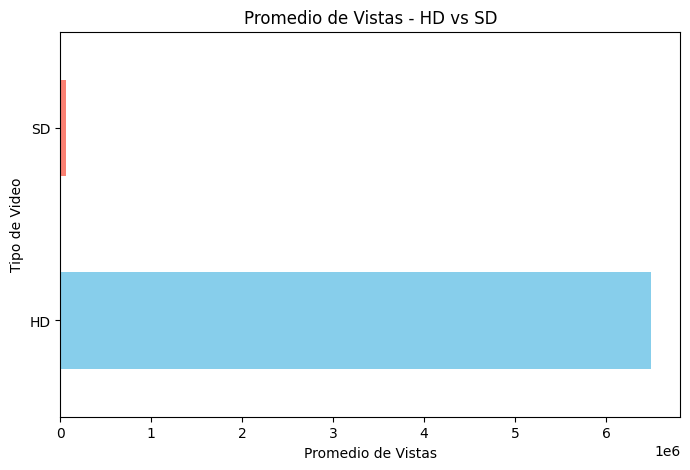

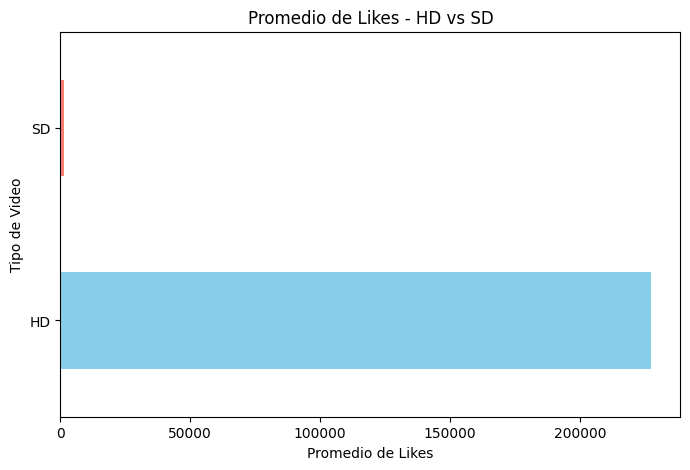

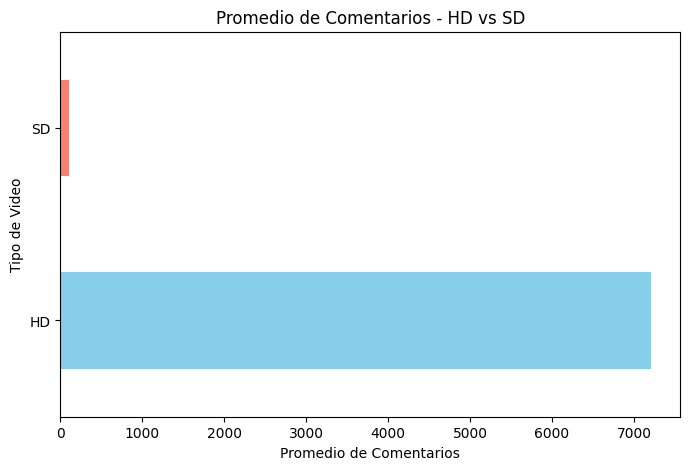

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el dataset en base a la definición de video (HD vs SD)
videos_hd = videos[videos['definition'] == 'hd']
videos_sd = videos[videos['definition'] == 'sd']

# Calcular las métricas promedio para cada tipo de definición
metricas_hd = {
    'Promedio de Vistas': videos_hd['view_count'].mean(),
    'Promedio de Likes': videos_hd['like_count'].mean(),
    'Promedio de Comentarios': videos_hd['comment_count'].mean()
}

metricas_sd = {
    'Promedio de Vistas': videos_sd['view_count'].mean(),
    'Promedio de Likes': videos_sd['like_count'].mean(),
    'Promedio de Comentarios': videos_sd['comment_count'].mean()
}

# Mostrar resultados
print("Métricas promedio para videos en HD:")
for key, value in metricas_hd.items():
    print(f"{key}: {value:.2f}")

print("\nMétricas promedio para videos en SD:")
for key, value in metricas_sd.items():
    print(f"{key}: {value:.2f}")


df_metricas = pd.DataFrame({
    'HD': metricas_hd,
    'SD': metricas_sd
})

# Gráfico para Promedio de Vistas
plt.figure(figsize=(8, 5))
df_metricas.loc['Promedio de Vistas'].plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('Promedio de Vistas - HD vs SD')
plt.xlabel('Promedio de Vistas')
plt.ylabel('Tipo de Video')
plt.show()

# Gráfico para Promedio de Likes
plt.figure(figsize=(8, 5))
df_metricas.loc['Promedio de Likes'].plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('Promedio de Likes - HD vs SD')
plt.xlabel('Promedio de Likes')
plt.ylabel('Tipo de Video')
plt.show()

# Gráfico para Promedio de Comentarios
plt.figure(figsize=(8, 5))
df_metricas.loc['Promedio de Comentarios'].plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('Promedio de Comentarios - HD vs SD')
plt.xlabel('Promedio de Comentarios')
plt.ylabel('Tipo de Video')
plt.show()


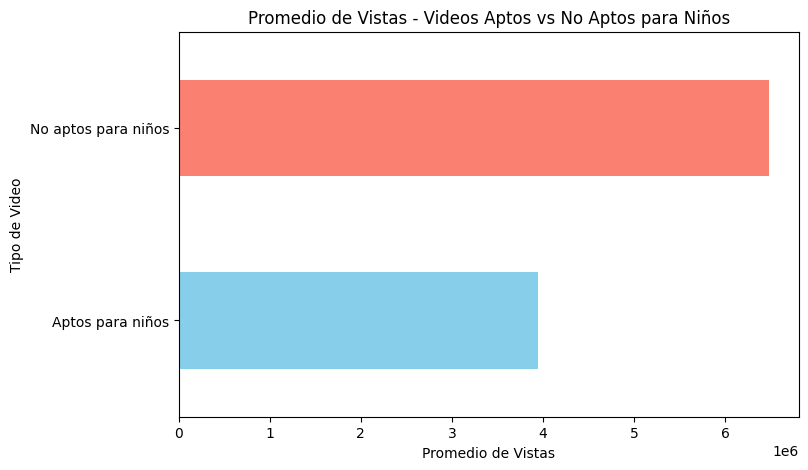

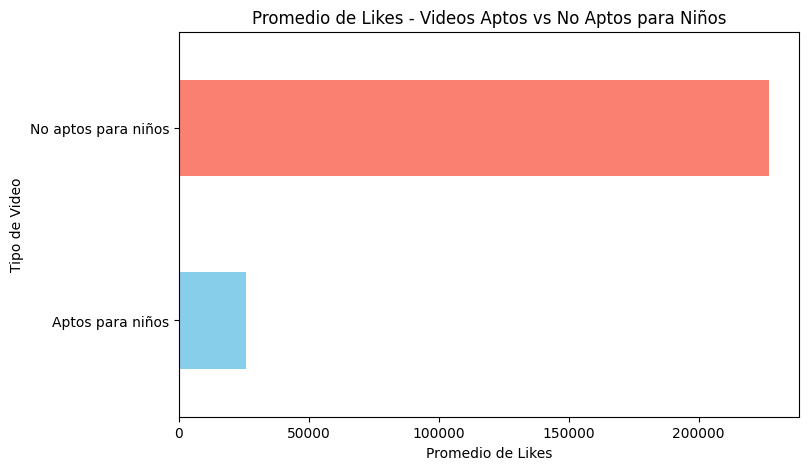

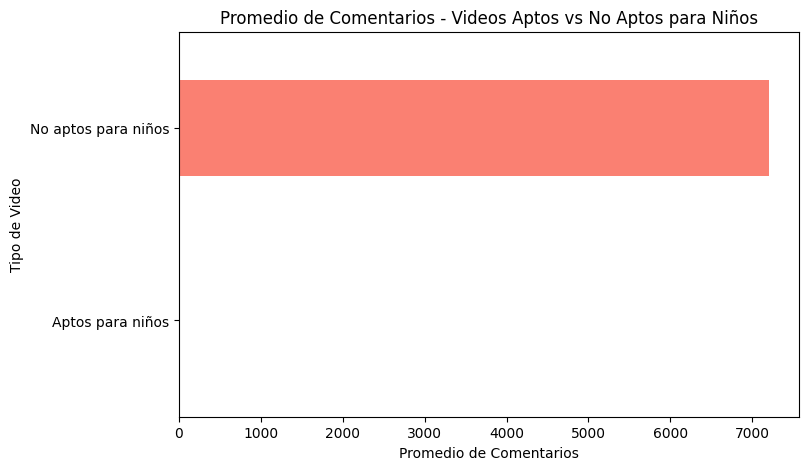

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el dataset en base a si el video es apto para niños o no
videos_para_ninos = videos[videos['made_for_kids'] == True]
videos_no_para_ninos = videos[videos['made_for_kids'] == False]

# Calcular las métricas promedio para cada tipo de video
metricas_para_ninos = {
    'Promedio de Vistas': videos_para_ninos['view_count'].mean(),
    'Promedio de Likes': videos_para_ninos['like_count'].mean(),
    'Promedio de Comentarios': videos_para_ninos['comment_count'].mean()
}

metricas_no_para_ninos = {
    'Promedio de Vistas': videos_no_para_ninos['view_count'].mean(),
    'Promedio de Likes': videos_no_para_ninos['like_count'].mean(),
    'Promedio de Comentarios': videos_no_para_ninos['comment_count'].mean()
}

# Crear un DataFrame con los resultados
df_metricas = pd.DataFrame({
    'Aptos para niños': metricas_para_ninos,
    'No aptos para niños': metricas_no_para_ninos
})

# Gráfico para Promedio de Vistas
plt.figure(figsize=(8, 5))
df_metricas.loc['Promedio de Vistas'].plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('Promedio de Vistas - Videos Aptos vs No Aptos para Niños')
plt.xlabel('Promedio de Vistas')
plt.ylabel('Tipo de Video')
plt.show()

# Gráfico para Promedio de Likes
plt.figure(figsize=(8, 5))
df_metricas.loc['Promedio de Likes'].plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('Promedio de Likes - Videos Aptos vs No Aptos para Niños')
plt.xlabel('Promedio de Likes')
plt.ylabel('Tipo de Video')
plt.show()

# Gráfico para Promedio de Comentarios
plt.figure(figsize=(8, 5))
df_metricas.loc['Promedio de Comentarios'].plot(kind='barh', color=['skyblue', 'salmon'])
plt.title('Promedio de Comentarios - Videos Aptos vs No Aptos para Niños')
plt.xlabel('Promedio de Comentarios')
plt.ylabel('Tipo de Video')
plt.show()


##4. Análisis de Títulos y Descripciones

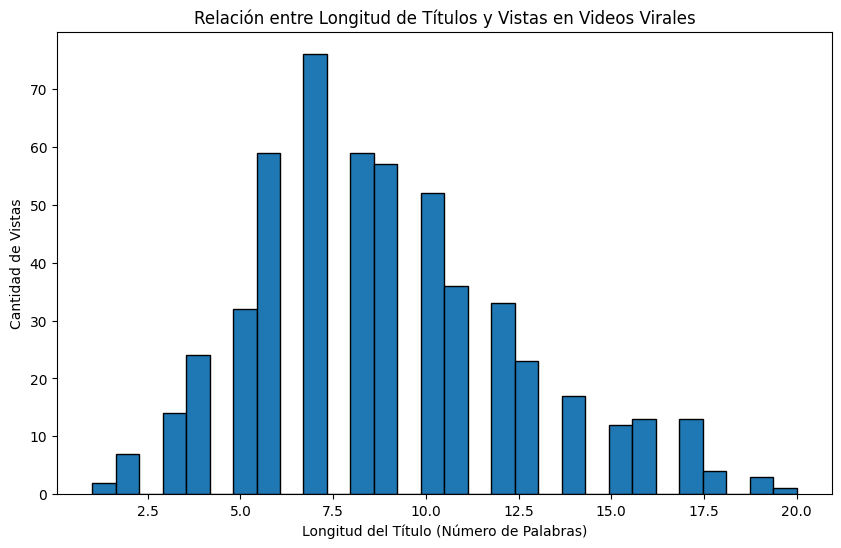

Longitud promedio de títulos en videos virales: 8.92 palabras


In [ ]:
videos_virales = videos.copy()
# Calcular la longitud de cada título en palabras
videos_virales['title_length'] = videos_virales['title'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Comparar longitud de títulos con número de vistas
plt.figure(figsize=(10, 6))
plt.hist(videos_virales['title_length'], bins=30, edgecolor='black')
plt.title('Relación entre Longitud de Títulos y Vistas en Videos Virales')
plt.xlabel('Longitud del Título (Número de Palabras)')
plt.ylabel('Cantidad de Vistas')
plt.show()

# Calcular la longitud promedio de títulos en videos virales
longitud_promedio_titulos = videos_virales['title_length'].mean()
print(f"Longitud promedio de títulos en videos virales: {longitud_promedio_titulos:.2f} palabras")


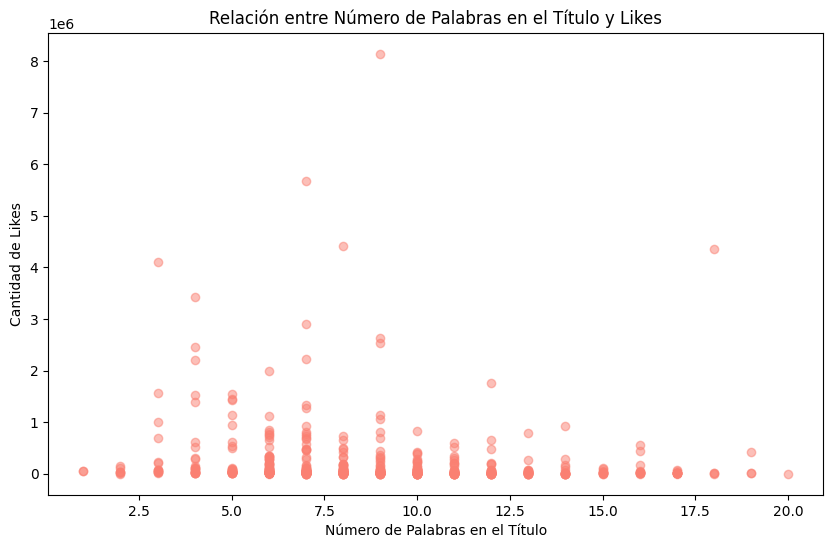

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular la longitud de cada título en palabras
videos['title_word_count'] = videos['title'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Crear scatter plot entre likes y número de palabras en el título
plt.figure(figsize=(10, 6))
plt.scatter(videos['title_word_count'], videos['like_count'], alpha=0.5, color='salmon')
plt.title('Relación entre Número de Palabras en el Título y Likes')
plt.xlabel('Número de Palabras en el Título')
plt.ylabel('Cantidad de Likes')
plt.show()


Longitud promedio de descripciones en videos virales: 111.17 palabras


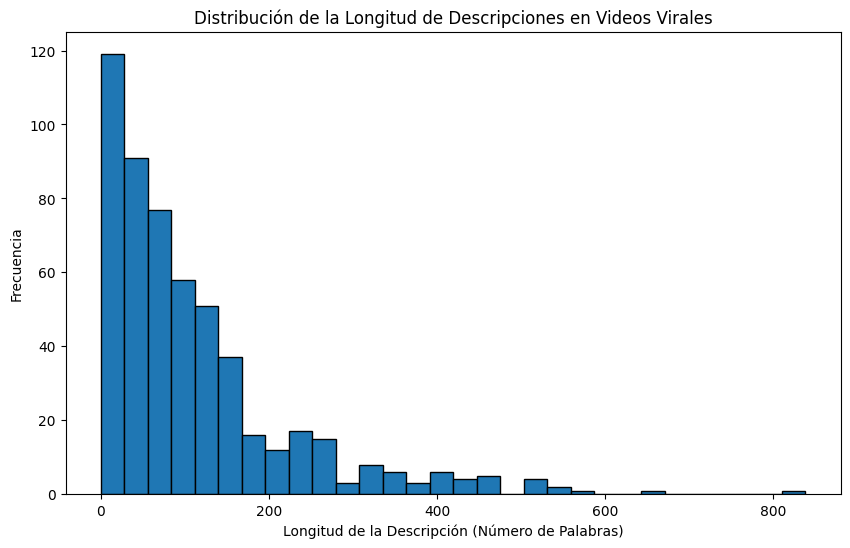

In [ ]:
# Calcular la longitud de cada descripción en palabras
videos_virales['description_length'] = videos_virales['description'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Calcular la longitud promedio de las descripciones
longitud_promedio_descripciones = videos_virales['description_length'].mean()
print(f"Longitud promedio de descripciones en videos virales: {longitud_promedio_descripciones:.2f} palabras")

# Graficar distribución de la longitud de las descripciones
plt.figure(figsize=(10, 6))
plt.hist(videos_virales['description_length'], bins=30, edgecolor='black')
plt.title('Distribución de la Longitud de Descripciones en Videos Virales')
plt.xlabel('Longitud de la Descripción (Número de Palabras)')
plt.ylabel('Frecuencia')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Términos más comunes en los títulos de videos virales (sin stopwords):
num: 137
highlights: 61
vs: 49
2024: 48
official: 44
video: 37
v: 25
music: 20
trailer: 19
game: 18


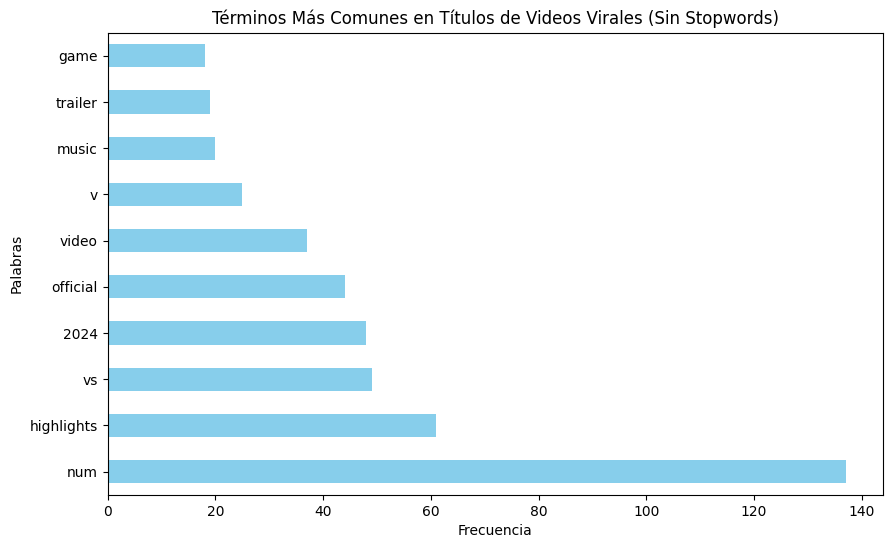

In [ ]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

videos_virales = videos.copy()

# Descargar stopwords de NLTK si no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para reemplazar valores monetarios y otros números, preservando años
def reemplazar_valores_monetarios(texto):
    # Reemplazar signos de puntuación, excepto símbolos de moneda
    texto = re.sub(r'[^\w\s\$\£\€]', '', texto)
    # Primero, reemplazamos valores monetarios ($1000, 1000$) por "$"
    texto = re.sub(r'(\$\d+\$|\$\d+|\d+\$)', 'Money', texto)
    # Luego, reemplazamos números que no son años (excluyendo 1900-2099) por "NUM"
    texto = re.sub(r'\b(?!19\d{2}|20[0-9]{2})\d+\b', 'NUM', texto)
    return texto.lower()

# Aplicar la función a los títulos de los videos virales
videos_virales['title_limpio'] = videos_virales['title'].dropna().apply(reemplazar_valores_monetarios)

# Concatenar todos los títulos y convertir a minúsculas
todas_palabras_titulos = " ".join(videos_virales['title_limpio'].dropna()).lower()

# Quitar stopwords y contar frecuencia de cada palabra
palabras_filtradas = [word for word in todas_palabras_titulos.split() if word not in stop_words]
palabras_titulos_contador = Counter(palabras_filtradas)

# Mostrar las 10 palabras más comunes
print("Términos más comunes en los títulos de videos virales (sin stopwords):")
for palabra, count in palabras_titulos_contador.most_common(10):
    print(f"{palabra}: {count}")

# Gráfico de las palabras más comunes
plt.figure(figsize=(10, 6))
pd.Series(dict(palabras_titulos_contador.most_common(10))).plot(kind='barh', color='skyblue')
plt.title('Términos Más Comunes en Títulos de Videos Virales (Sin Stopwords)')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()


In [ ]:
# Contar títulos que terminan en signo de interrogación
titulos_pregunta = videos_virales['title'].apply(lambda x: x.strip().endswith('?') if pd.notnull(x) else False)
frecuencia_pregunta = titulos_pregunta.mean() * 100

print(f"Porcentaje de títulos en videos virales que son preguntas: {frecuencia_pregunta:.2f}%")


Porcentaje de títulos en videos virales que son preguntas: 2.23%


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


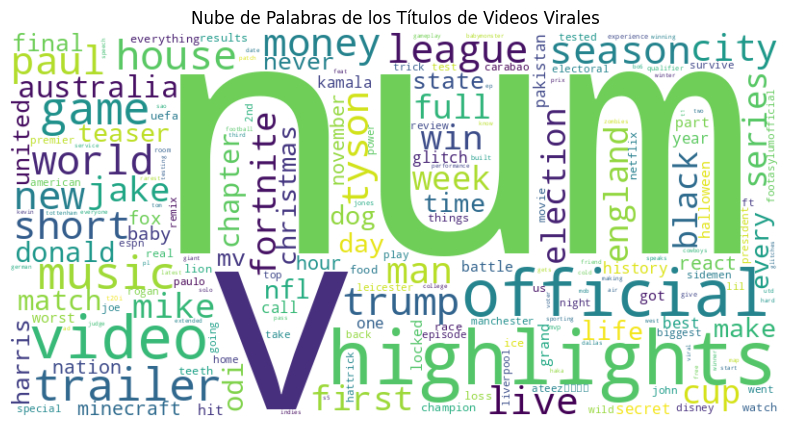

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from collections import Counter

videos_virales = videos.copy()

# Descargar stopwords de NLTK si no están descargadas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para reemplazar valores monetarios en los títulos con "$"
def reemplazar_valores_monetarios(texto):
    # Reemplazar signos de puntuación, excepto símbolos de moneda
    texto = re.sub(r'[^\w\s\$\£\€]', '', texto)
    # Primero, reemplazamos valores monetarios ($1000, 1000$) por "$"
    texto = re.sub(r'(\$\d+\$|\$\d+|\d+\$)', 'Money', texto)
    # Luego, reemplazamos números que no son años (excluyendo 1900-2099) por "NUM"
    texto = re.sub(r'\b(?!19\d{2}|20[0-9]{2})\d+\b', 'NUM', texto)
    return texto.lower()

# Aplicar la función a los títulos de los videos virales
videos_virales['title_limpio'] = videos_virales['title'].dropna().apply(reemplazar_valores_monetarios)

# Concatenar todos los títulos y convertir a minúsculas
todas_palabras_titulos = " ".join(videos_virales['title_limpio'].dropna()).lower()

# Quitar stopwords
palabras_filtradas = [word for word in todas_palabras_titulos.split() if word not in stop_words]

# Generar una cadena de texto con las palabras filtradas
texto_filtrado = " ".join(palabras_filtradas)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(texto_filtrado)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de los Títulos de Videos Virales")
plt.show()


Primeras palabras más comunes en títulos de videos virales:
i: 32
the: 31
how: 13
highlights: 12
num: 9
this: 8
my: 7
we: 7
australia: 7
mike: 6


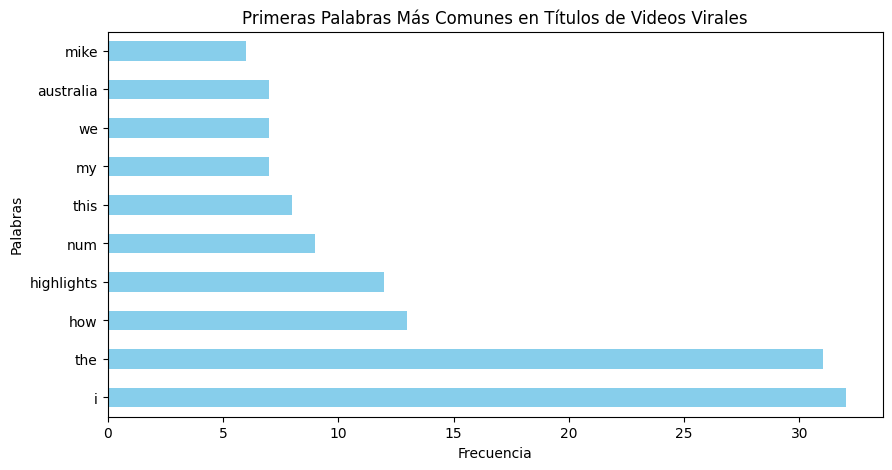


Primeras dos palabras más comunes en títulos de videos virales:
australia v: 7
how to: 6
i tested: 4
highlights all: 4
donald trump: 4
joe rogan: 4
i built: 4
mike tyson: 4
jake paul: 4
fortnite chapter: 3


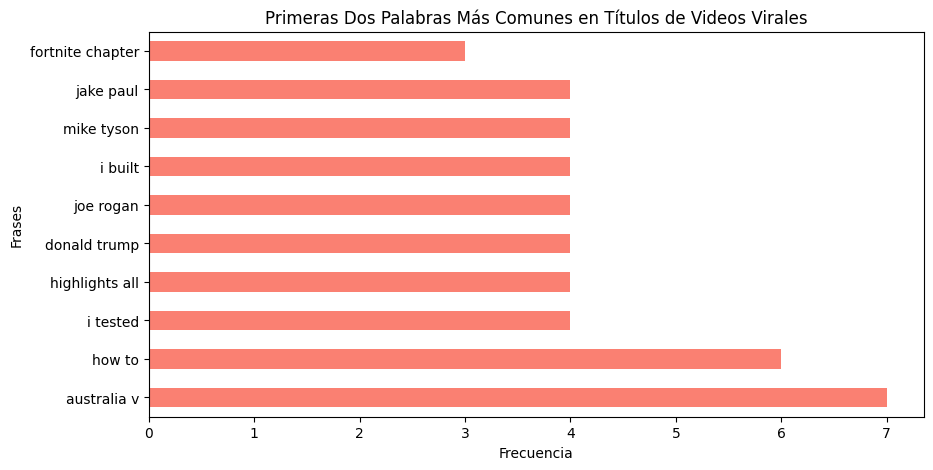


Primeras tres palabras más comunes en títulos de videos virales:
australia v pakistan: 6
highlights all blacks: 4
fortnite chapter num: 3
joe rogan experience: 3
ateez에이티즈 ice on: 3
skibidi toilet multiverse: 2
lady gaga disease: 2
babymonster clik clak: 2
pacific championships 2024: 2
apex legends from: 2


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


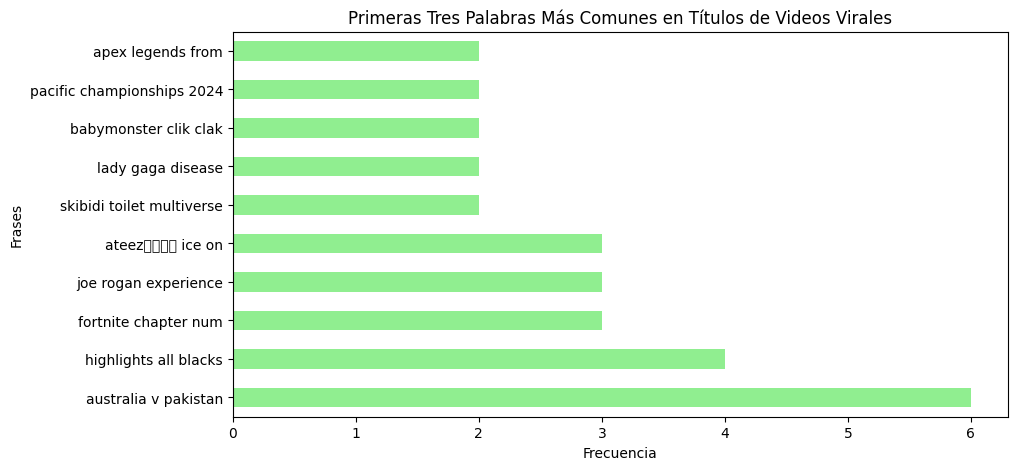

In [ ]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

videos_virales = videos.copy()

# Función para reemplazar valores monetarios en los títulos con "$"
def reemplazar_valores_monetarios(texto):
    # Reemplazar signos de puntuación, excepto símbolos de moneda
    texto = re.sub(r'[^\w\s\$\£\€]', '', texto)
    # Primero, reemplazamos valores monetarios ($1000, 1000$) por "$"
    texto = re.sub(r'(\$\d+\$|\$\d+|\d+\$)', 'Money', texto)
    # Luego, reemplazamos números que no son años (excluyendo 1900-2099) por "NUM"
    texto = re.sub(r'\b(?!19\d{2}|20[0-9]{2})\d+\b', 'NUM', texto)
    return texto.lower()

# Aplicar la función a los títulos de los videos virales
videos_virales['title_limpio'] = videos_virales['title'].dropna().apply(reemplazar_valores_monetarios)

# Extraer primeras 1, 2 y 3 palabras de cada título
primeras_palabras_1 = []
primeras_palabras_2 = []
primeras_palabras_3 = []

for title in videos_virales['title_limpio'].dropna():
    # Convertir título a minúsculas y eliminar signos de puntuación
    palabras = title.split()

    # Extraer primeras 1, 2 y 3 palabras si existen
    if len(palabras) >= 1:
        primeras_palabras_1.append(palabras[0])
    if len(palabras) >= 2:
        primeras_palabras_2.append(" ".join(palabras[:2]))
    if len(palabras) >= 3:
        primeras_palabras_3.append(" ".join(palabras[:3]))

# Contar frecuencia de las primeras 1, 2 y 3 palabras
contador_1 = Counter(primeras_palabras_1)
contador_2 = Counter(primeras_palabras_2)
contador_3 = Counter(primeras_palabras_3)

# Mostrar y graficar los 10 más comunes para cada caso

# Primeras palabras
print("Primeras palabras más comunes en títulos de videos virales:")
for palabra, count in contador_1.most_common(10):
    print(f"{palabra}: {count}")
plt.figure(figsize=(10, 5))
pd.Series(dict(contador_1.most_common(10))).plot(kind='barh', color='skyblue')
plt.title('Primeras Palabras Más Comunes en Títulos de Videos Virales')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

# Primeras dos palabras
print("\nPrimeras dos palabras más comunes en títulos de videos virales:")
for frase, count in contador_2.most_common(10):
    print(f"{frase}: {count}")
plt.figure(figsize=(10, 5))
pd.Series(dict(contador_2.most_common(10))).plot(kind='barh', color='salmon')
plt.title('Primeras Dos Palabras Más Comunes en Títulos de Videos Virales')
plt.xlabel('Frecuencia')
plt.ylabel('Frases')
plt.show()

# Primeras tres palabras
print("\nPrimeras tres palabras más comunes en títulos de videos virales:")
for frase, count in contador_3.most_common(10):
    print(f"{frase}: {count}")
plt.figure(figsize=(10, 5))
pd.Series(dict(contador_3.most_common(10))).plot(kind='barh', color='lightgreen')
plt.title('Primeras Tres Palabras Más Comunes en Títulos de Videos Virales')
plt.xlabel('Frecuencia')
plt.ylabel('Frases')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               title  \
0  "Barbering and Fashion: HoWStyle Infiuences Ha...   
2    Lil Uzi Vert - Chill Bae [Official Music Video]   
4  Is This a WW2 German Spy Hideout, Discovered i...   
5  Young Thug Gives Heartfelt Speech Before Walki...   
6       Reload Desert Drop: New Map, Solos, and More   

                                         clean_title  sentiment  
0      barbering fashion howstyle infiuences haircut   0.000000  
2        lil uzi vert chill bae official music video   0.000000  
4  ww2 german spy hideout discovered american desert   0.000000  
5  young thug give heartfelt speech walking ysl t...   0.050000  
6                    reload desert drop new map solo   0.136364  


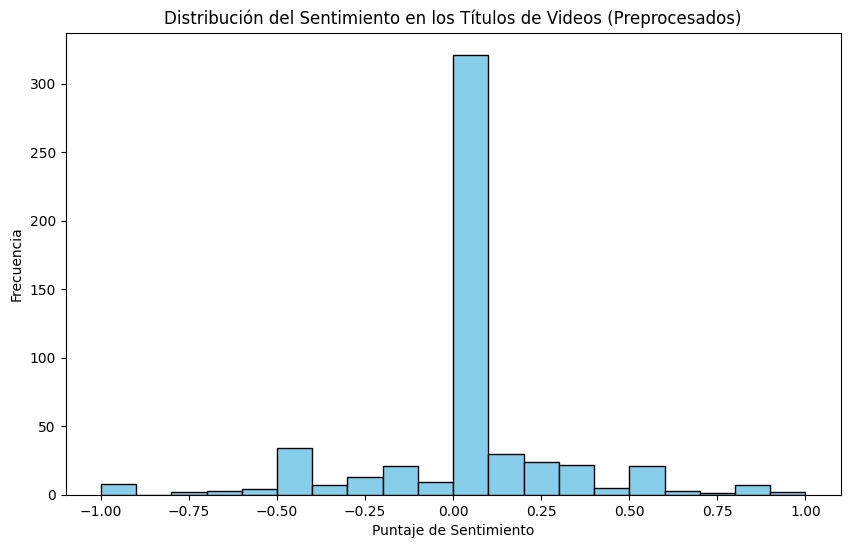

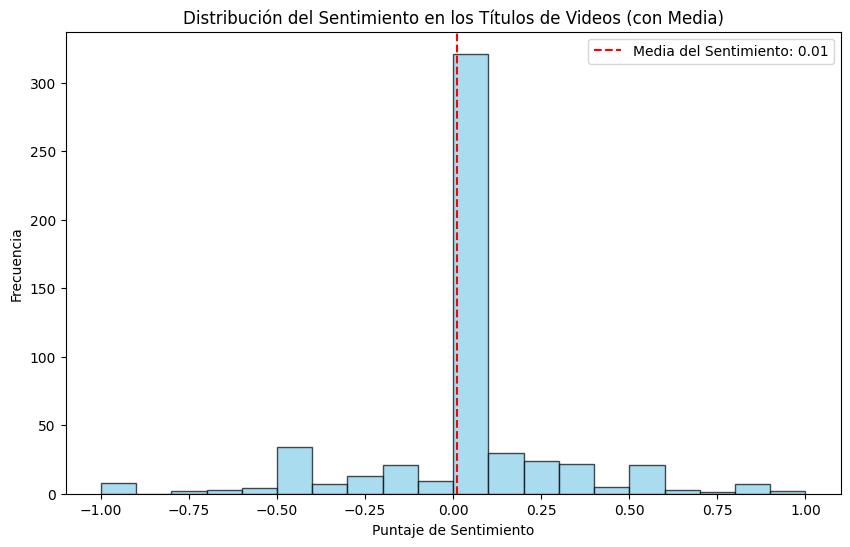

In [ ]:
import re
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Configurar stopwords y lematizador
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Quitar puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    # Quitar stopwords y lematizar
    palabras = texto.split()
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras if palabra not in stop_words]
    return " ".join(palabras)

# Aplicar preprocesamiento a los títulos
videos['clean_title'] = videos['title'].apply(lambda x: preprocesar_texto(x) if pd.notnull(x) else '')

# Función para obtener el puntaje de sentimiento de cada título
def obtener_sentimiento(titulo):
    blob = TextBlob(titulo)
    return blob.sentiment.polarity  # Retorna un valor entre -1 (negativo) y 1 (positivo)

# Aplicar el análisis de sentimiento a cada título preprocesado
videos['sentiment'] = videos['clean_title'].apply(lambda x: obtener_sentimiento(x))

# Verificar algunos resultados
print(videos[['title', 'clean_title', 'sentiment']].head())

# Graficar la distribución de los puntajes de sentimiento
plt.figure(figsize=(10, 6))
plt.hist(videos['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Sentimiento en los Títulos de Videos (Preprocesados)')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Graficar la media del sentimiento para visualizar la tendencia
mean_sentiment = videos['sentiment'].mean()
plt.figure(figsize=(10, 6))
plt.axvline(mean_sentiment, color='red', linestyle='--', label=f'Media del Sentimiento: {mean_sentiment:.2f}')
plt.hist(videos['sentiment'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución del Sentimiento en los Títulos de Videos (con Media)')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


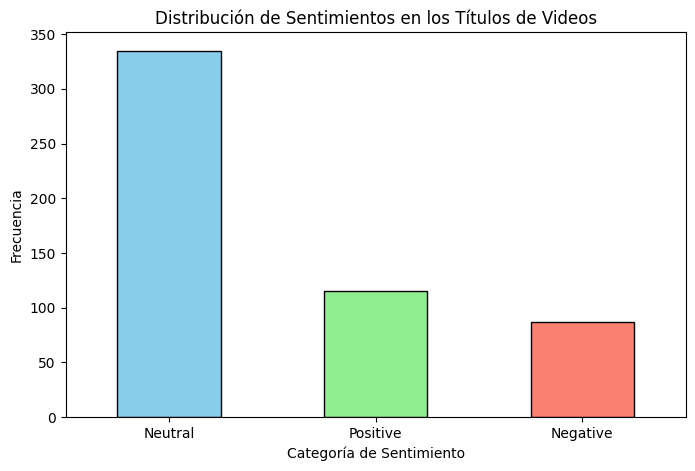

In [ ]:
videos['sentiment_category'] = videos['sentiment'].apply(lambda x: 'Neutral' if -0.1 <= x <= 0.1 else ('Positive' if x > 0.1 else 'Negative'))

# Contar las categorías de sentimiento
sentiment_counts = videos['sentiment_category'].value_counts()

# Graficar los resultados
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title('Distribución de Sentimientos en los Títulos de Videos')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

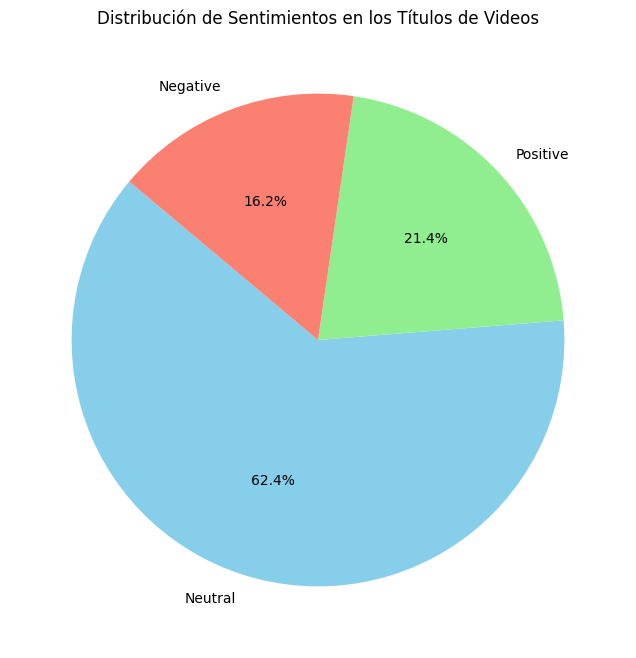

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Distribución de Sentimientos en los Títulos de Videos')
plt.show()

##5. Análisis Temporal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'published_at' a tipo datetime si no lo está
videos['published_at'] = pd.to_datetime(videos['published_at'])

# Crear una columna para la hora del día y el día de la semana
videos['hour'] = videos['published_at'].dt.hour
videos['day_of_week'] = videos['published_at'].dt.day_name()



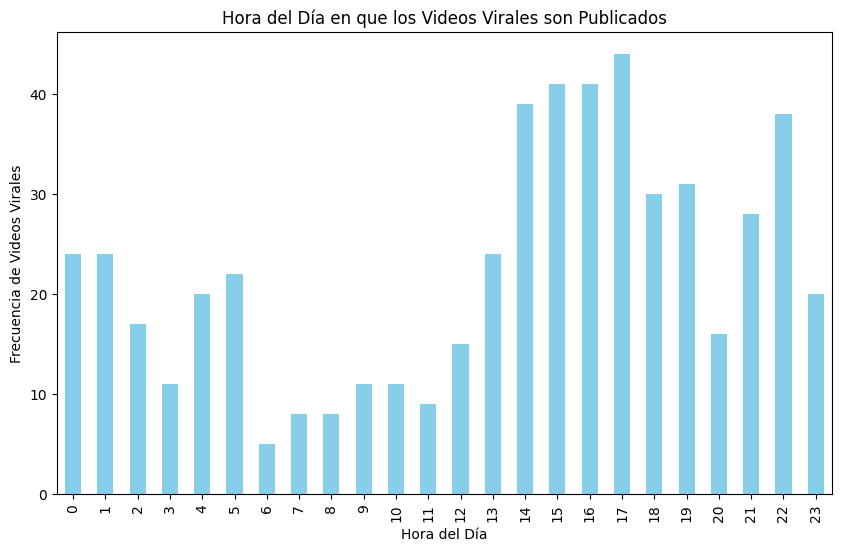

In [ ]:
# Contar la frecuencia de videos virales por hora de publicación
hora_viral = videos['hour'].value_counts().sort_index()

# Graficar la distribución de la hora de publicación de videos virales
plt.figure(figsize=(10, 6))
hora_viral.plot(kind='bar', color='skyblue')
plt.title('Hora del Día en que los Videos Virales son Publicados')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia de Videos Virales')
plt.show()


In [ ]:
import re

# Función para convertir la duración en formato ISO 8601 a segundos
def convertir_duracion_a_segundos(duracion):
    # Expresiones regulares para encontrar horas, minutos y segundos en el formato
    horas = re.search(r'(\d+)H', duracion)
    minutos = re.search(r'(\d+)M', duracion)
    segundos = re.search(r'(\d+)S', duracion)

    # Extraer las horas, minutos y segundos; si no existen, asignar 0
    horas = int(horas.group(1)) if horas else 0
    minutos = int(minutos.group(1)) if minutos else 0
    segundos = int(segundos.group(1)) if segundos else 0

    # Convertir todo a segundos
    return horas * 3600 + minutos * 60 + segundos

# Aplicar la conversión a la columna 'duration'
videos['duration_minutes'] = videos['duration'].apply(convertir_duracion_a_segundos)/60

# Verificar algunas conversiones
print(videos[['duration', 'duration_minutes']].head())



   duration  duration_minutes
0   PT1M14S          1.233333
2   PT3M25S          3.416667
4  PT25M12S         25.200000
5   PT9M19S          9.316667
6     PT30S          0.500000


Duración promedio de videos virales: 18.68 segundos


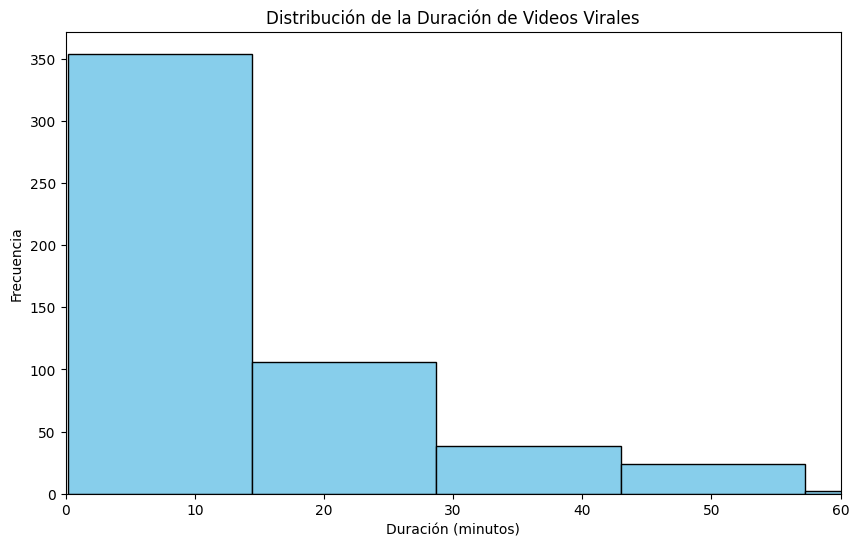

In [ ]:
# Calcular la duración promedio de los videos virales
duracion_promedio = videos['duration_minutes'].mean()
print(f"Duración promedio de videos virales: {duracion_promedio:.2f} segundos")

# Graficar la distribución de la duración de los videos virales
plt.figure(figsize=(10, 6))
plt.hist(videos['duration_minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Duración de Videos Virales')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xlim(0, 60)  # Establecer un límite en el eje x
plt.show()


Duración promedio de videos virales: 18.68 segundos


<ipython-input-45-67855dcbc54b>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(videos['duration_minutes'], shade=True, color='skyblue')


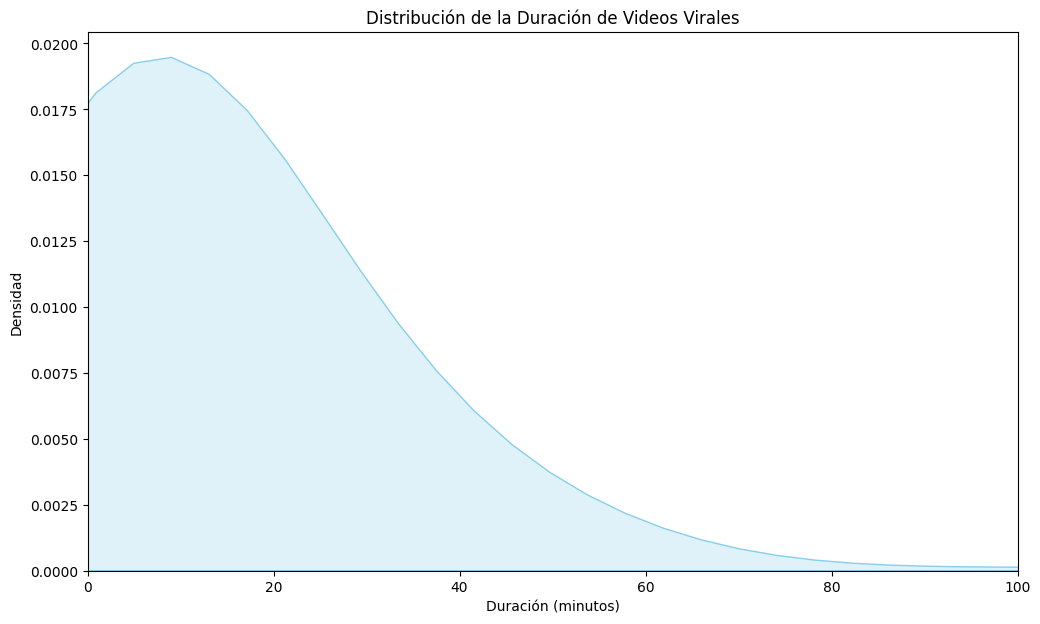

In [ ]:
import seaborn as sns

# Calcular la duración promedio de los videos virales
duracion_promedio = videos['duration_minutes'].mean()
print(f"Duración promedio de videos virales: {duracion_promedio:.2f} segundos")

# Graficar la distribución de la duración de los videos virales con un gráfico de densidad
plt.figure(figsize=(12, 7))
sns.kdeplot(videos['duration_minutes'], shade=True, color='skyblue')
plt.title('Distribución de la Duración de Videos Virales')
plt.xlabel('Duración (minutos)')
plt.ylabel('Densidad')
plt.xlim(0, 100)  # Establecer un límite en el eje x
plt.show()

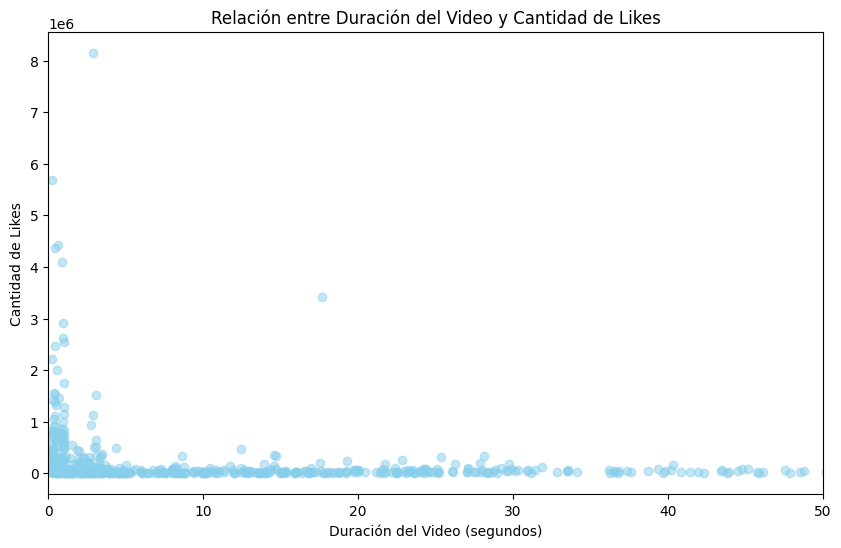

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión entre la duración del video (en minutos) y la cantidad de likes
plt.figure(figsize=(10, 6))
plt.scatter(videos['duration_minutes'], videos['like_count'], alpha=0.5, color='skyblue')
plt.title('Relación entre Duración del Video y Cantidad de Likes')
plt.xlabel('Duración del Video (segundos)')
plt.ylabel('Cantidad de Likes')
plt.xlim(0, 50)
plt.show()


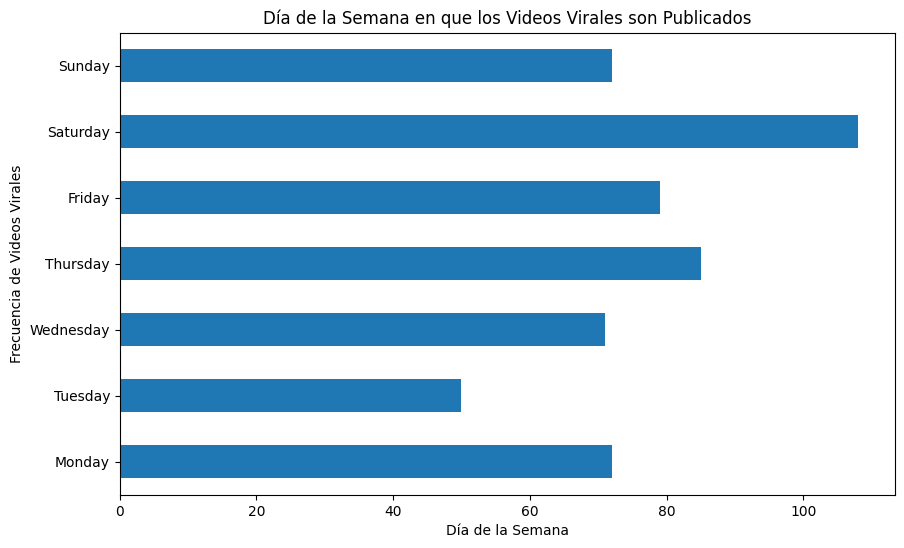

In [ ]:
# Contar la frecuencia de videos virales por día de la semana
dia_semana_viral = videos['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Graficar la distribución de días de publicación de videos virales
plt.figure(figsize=(10, 6))
dia_semana_viral.plot(kind='barh')
plt.title('Día de la Semana en que los Videos Virales son Publicados')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia de Videos Virales')
plt.show()


##6. Análisis de temas

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Configurar stopwords y lematizador
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocesar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\b\d+\b', 'num', texto)  # Reemplazar números con "num"
    texto = re.sub(r'[\W_]+', ' ', texto)  # Quitar puntuación y caracteres especiales
    palabras = texto.split()
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras if palabra not in stop_words]  # Lematizar y quitar stopwords
    return " ".join(palabras)


# Preprocesar los títulos
videos['clean_title_bert'] = videos['title'].apply(lambda x: preprocesar_texto(x) if pd.notnull(x) else '')

# Preprocesar los tags (opcional)
videos['clean_tags_bert'] = videos['tags'].apply(lambda x: preprocesar_texto(x) if pd.notnull(x) else '')

# Concatenar título y tags para análisis más completo (opcional)
videos['combined_text'] = videos['clean_title_bert'] + ' ' + videos['clean_tags_bert']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

In [ ]:
model = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics, probs = model.fit_transform(videos['combined_text'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head(10)

Number of topics: 8


,Topic,Count,Name,Representation,Representative_Docs
0,-1,44,-1_yellowstone_num_season_jschlatt,"[yellowstone, num, season, jschlatt, haka, rog...",[joe rogan experience num donald trump joe rog...
1,0,349,0_num_fortnite_game_video,"[num, fortnite, game, video, new, minecraft, g...",[fortnite chapter num fortnite fortnite battle...
2,1,32,1_news_trump_election_donald,"[news, trump, election, donald, harris, politi...",[american react donald trump presidential elec...
3,2,30,2_league_highlight_sport_premier,"[league, highlight, sport, premier, football, ...",[gyökeres hat trick destroys man city sporting...
4,3,27,3_highlight_nrl_cricket_indie,"[highlight, nrl, cricket, indie, west, rugby, ...",[livingstone hope hit ton highlight west indie...
5,4,23,4_tyson_paul_mike_jake,"[tyson, paul, mike, jake, boxing, aew, fight, ...",[mike tyson b slap jake paul weigh hell break ...
6,5,20,5_nfl_ram_fox_week,"[nfl, ram, fox, week, stephen, num, cfb, sport...",[highlight ram top play overtime win v seahawk...
7,6,12,6_stray_logo_ateez_에이티즈,"[stray, logo, ateez, 에이티즈, kid, hop, skz, kb, ...",[babymonster clik clak performance video babym...


In [ ]:
model.visualize_barchart(top_n_topics=6)

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_hierarchy(top_n_topics=30)


In [ ]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("game", top_n = 3)

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('num', 0.05358789456329393), ('fortnite', 0.03809949885183767), ('glitch', 0.02847129341531445), ('game', 0.02733457583312918), ('new', 0.026884992411645797), ('video', 0.02346174640180069), ('chapter', 0.021186162323096284), ('funny', 0.017927282508027394), ('bo6', 0.01750223827426677), ('battle', 0.01750223827426677)]
Similarity Score: 0.4106541574001312
